In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load your dataset (assuming it's stored in a CSV file)
df = pd.read_csv('sorted_insider_trading_data.csv')


In [3]:
df.info


<bound method DataFrame.info of       SYMBOL \n               NAME OF THE ACQUIRER/DISPOSER \n  \
0      CHOICEIN                                Manoj Singhania   
1      CHOICEIN                                  Karishma Shah   
2      CHOICEIN                                   Ayush Sharma   
3      CHOICEIN                           Bhal Chandra Murarka   
4      CHOICEIN                                  Yogesh Jadhav   
..          ...                                            ...   
504  JAYNECOIND           JAYASWAL NECO ENERGY PRIVATE LIMITED   
505  JAYNECOIND  JAYASWAL NECO INFRASTRUCTURES PRIVATE LIMITED   
506  JAYNECOIND            JAYASWAL NECO POWER PRIVATE LIMITED   
507  JAYNECOIND                                  RITA JAYASWAL   
508  JAYNECOIND              JAYASWAL HOLDINGS PRIVATE LIMITED   

    CATEGORY OF PERSON \n TYPE OF SECURITY (PRIOR) \n  \
0                       -               Equity Shares   
1                       -               Equity Shares   
2   

In [4]:
print(df.columns)

Index(['SYMBOL \n', 'NAME OF THE ACQUIRER/DISPOSER \n',
       'CATEGORY OF PERSON \n', 'TYPE OF SECURITY (PRIOR) \n',
       '% SHAREHOLDING (PRIOR) \n',
       'NO. OF SECURITIES (ACQUIRED/DISPLOSED) \n',
       'VALUE OF SECURITY (ACQUIRED/DISPLOSED) \n',
       'ACQUISITION/DISPOSAL TRANSACTION TYPE \n', 'NO. OF SECURITY (POST) \n',
       'DATE OF ALLOTMENT/ACQUISITION FROM \n', 'MODE OF ACQUISITION \n',
       'NUMBER OF UNITS/CONTRACT LOT SIZE  (SELL) \n', 'is_insider'],
      dtype='object')


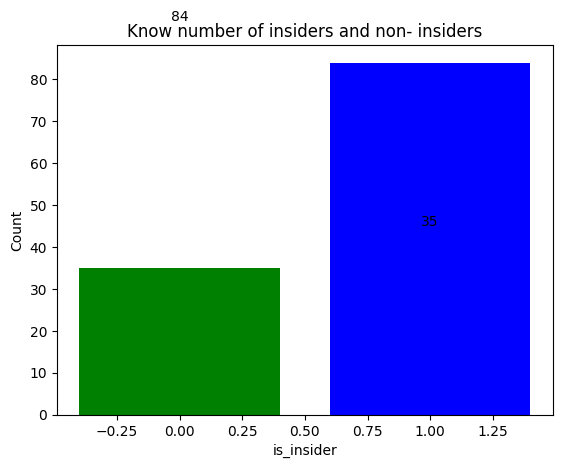

In [20]:
# Count the occurrences of each value in the binary column
value_counts = df['is_insider'].value_counts()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('is_insider')
plt.ylabel('Count')
plt.title('Know number of insiders and non- insiders')

# Add value labels on top of each bar
for i, v in enumerate(value_counts.values):
    plt.text(i, v + 10, str(v), ha='center')

# Show the plot
plt.show()

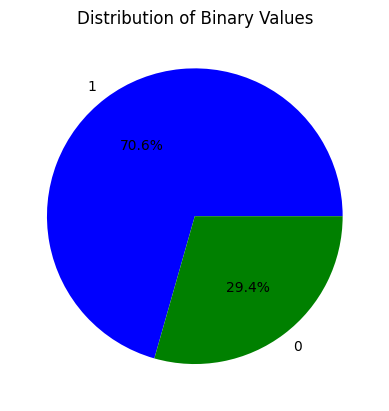

In [21]:
# Create a pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', colors=['blue', 'green'])

# Add title
plt.title('Distribution of Binary Values')

# Show the plot
plt.show()

In [130]:
columns_to_drop = ['TYPE OF SECURITY (ACQUIRED/DISPLOSED) \r\n', 'COMPANY \r\n','REGULATION \r\n','NAME OF THE ACQUIRER/DISPOSER \r\n','DERIVATIVE TYPE SECURITY \r\n','DERIVATIVE CONTRACT SPECIFICATION \r\n','NOTIONAL VALUE(BUY) \r\n','NUMBER OF UNITS/CONTRACT LOT SIZE (BUY) \r\n','NOTIONAL VALUE(SELL) \r\n','NUMBER OF UNITS/CONTRACT LOT SIZE  (SELL) \r\n','EXCHANGE \r\n','REMARK \r\n','BROADCASTE DATE AND TIME \r\n','XBRL \r\n']
df.drop(columns=columns_to_drop, inplace=True)

In [5]:
df

SYMBOL \n               NAME OF THE ACQUIRER/DISPOSER \n  \
0      CHOICEIN                                Manoj Singhania   
1      CHOICEIN                                  Karishma Shah   
2      CHOICEIN                                   Ayush Sharma   
3      CHOICEIN                           Bhal Chandra Murarka   
4      CHOICEIN                                  Yogesh Jadhav   
..          ...                                            ...   
504  JAYNECOIND           JAYASWAL NECO ENERGY PRIVATE LIMITED   
505  JAYNECOIND  JAYASWAL NECO INFRASTRUCTURES PRIVATE LIMITED   
506  JAYNECOIND            JAYASWAL NECO POWER PRIVATE LIMITED   
507  JAYNECOIND                                  RITA JAYASWAL   
508  JAYNECOIND              JAYASWAL HOLDINGS PRIVATE LIMITED   

    CATEGORY OF PERSON \n TYPE OF SECURITY (PRIOR) \n  \
0                       -               Equity Shares   
1                       -               Equity Shares   
2                       -               Equity Shares   
3                       -               Equity Shares   
4                       -               Equity Shares   
..                    ...                         ...   
504        Promoter Group               Equity Shares   
505        Promoter Group               Equity Shares   
506        Promoter Group               Equity Shares   
507             Promoters               Equity Shares   
508        Promoter Group               Equity Shares   

     % SHAREHOLDING (PRIOR) \n  NO. OF SECURITIES (ACQUIRED/DISPLOSED) \n  \
0                         0.00                                        NaN   
1                         0.03                                        NaN   
2                         0.03                                        NaN   
3                         0.04                                        NaN   
4                         1.13                                    38596.0   
..                         ...                                        ...   
504                       4.57                                     3899.0   
505                       4.04                                        NaN   
506                       3.85                                        NaN   
507                       0.00                                        NaN   
508                       5.47                                        NaN   

     VALUE OF SECURITY (ACQUIRED/DISPLOSED) \n  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                     193536.0   
..                                         ...   
504                                  6735147.0   
505                                        NaN   
506                                        NaN   
507                                        NaN   
508                                        NaN   

    ACQUISITION/DISPOSAL TRANSACTION TYPE \n NO. OF SECURITY (POST) \n  \
0                                        Buy                      5000   
1                                        Buy                     30000   
2                                        Buy                     30000   
3                                        Buy                     49248   
4                                        Buy                   1137500   
..                                       ...                       ...   
504                                      Buy                  47111320   
505                                      Buy                  41938431   
506                                      Buy                  40087987   
507                                      Buy                   2716820   
508                                      Buy                  55790771   

    DATE OF ALLOTMENT/ACQUISITION FROM \n MODE OF ACQUISITION \n  \
0                              2024-01-15    

In [111]:
#new2_df = new_df.dropna(subset=['NO. OF SECURITY (PRIOR) \r\n'])
#new2_df = new_df[new_df['NO. OF SECURITY (PRIOR) \r\n'] != 'Nil']


In [8]:
nan_values = df.isna().any().any()

if nan_values:
    print("There are NaN values in the dataset.")
else:
    print("There are no NaN values in the dataset.")

There are no NaN values in the dataset.


In [7]:
df = df.dropna(axis=0)

In [9]:
# Assuming 'is_insider' is your target variable and the rest are features
X = df.drop(columns=['is_insider'])  # Features
y = df['is_insider']  # Target variable

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Concatenate the training and testing sets to ensure consistent encoding
concatenated_df = pd.concat([X_train, X_test], axis=0)

# One-hot encode categorical variables
concatenated_encoded = pd.get_dummies(concatenated_df)

# Split back into training and testing sets
X_train_encoded = concatenated_encoded.iloc[:len(X_train)]
X_test_encoded = concatenated_encoded.iloc[len(X_train):]

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


In [12]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

In [13]:
# Train the model
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [14]:
# Predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [16]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        16

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [17]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 8  0]
 [ 0 16]]
